In [1]:
# Imports // use https://pub.towardsai.net/predict-the-stock-trend-using-deep-learning-5a4b7df1d152

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split

print("Imports Completed")

Imports Completed


In [2]:
# Import Dataset and Split
inputs = pd.read_csv("C:/Users/tiafo/Desktop/BankOfEnglandInnovaitonCompetition/JupyterNotebook/inputs.csv")
outputs = pd.read_csv("C:/Users/tiafo/Desktop/BankOfEnglandInnovaitonCompetition/JupyterNotebook/outputs.csv")

inputs_features_names = ['GDP','CPIH','BankRate','HousePrices','Unemployment']
inputs_features = inputs[inputs_features_names]
tf.convert_to_tensor(inputs_features)

outputs_features_names = ['CPIH']
outputs_features = outputs[outputs_features_names]
tf.convert_to_tensor(outputs_features)

print("Datasets Loaded and table split")

Datasets Loaded and table split


In [3]:
# Create Model
def get_basic_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['accuracy'])
    return model

model = get_basic_model()
model.fit(inputs_features, outputs_features, epochs=15, batch_size=1)

Epoch 1/15
308/308 [==============================] - 1s 2ms/step - loss: -702900.1250 - accuracy: 0.0195
Epoch 2/15
308/308 [==============================] - 0s 1ms/step - loss: -19785606.0000 - accuracy: 0.0195
Epoch 3/15
308/308 [==============================] - 0s 1ms/step - loss: -100691632.0000 - accuracy: 0.0195
Epoch 4/15
308/308 [==============================] - 0s 1ms/step - loss: -314496000.0000 - accuracy: 0.0195
Epoch 5/15
308/308 [==============================] - 1s 2ms/step - loss: -771288192.0000 - accuracy: 0.0195
Epoch 6/15
308/308 [==============================] - 0s 1ms/step - loss: -1648113536.0000 - accuracy: 0.0195
Epoch 7/15
308/308 [==============================] - 0s 1ms/step - loss: -3028661504.0000 - accuracy: 0.0195
Epoch 8/15
308/308 [==============================] - 1s 2ms/step - loss: -4974685184.0000 - accuracy: 0.0195
Epoch 9/15
308/308 [==============================] - 0s 2ms/step - loss: -7677314048.0000 - accuracy: 0.0195
Epoch 10/15
308/308

In [4]:
np.savetxt("C:/Users/tiafo/Desktop/BankOfEnglandInnovaitonCompetition/JupyterNotebook/processed.csv",model.predict(inputs_features),delimiter=",")

10/10 [==============================] - 0s 1ms/step


In [5]:
inputs_features

,GDP,CPIH,BankRate,HousePrices,Unemployment
0,63.8,2.6,5.94,60698.40391,7.5
1,64.8,2.4,5.94,60698.40391,7.3
2,64.9,2.2,5.94,60698.40391,7.2
3,65.2,2.1,5.94,61946.00292,7.2
4,64.7,2.1,5.94,61946.00292,7.2
...,...,...,...,...,...
303,100.5,7.8,0.75,280991.65680,3.8
304,101.0,7.9,0.75,283488.09330,3.8
305,100.4,8.2,1.00,287166.18870,3.6
306,100.7,8.8,1.25,293323.72160,3.5


10/10 [==============================] - 0s 1ms/step


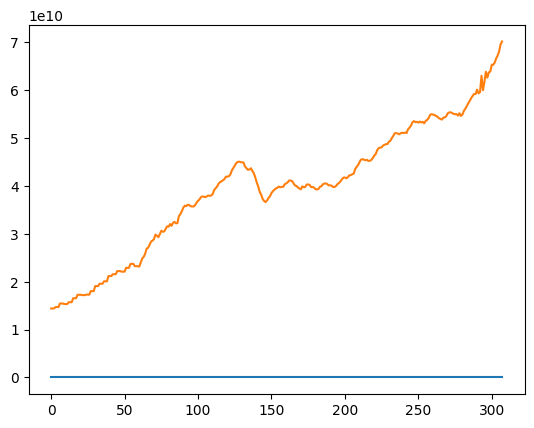

In [6]:
plt.plot(outputs_features)
plt.plot(model.predict(inputs_features))
plt.show()